In [28]:
from IPython.display import Image
import graphviz 
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from sklearn.datasets import load_iris, load_wine, load_boston
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('heart 4.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.corr().unstack().sort_values().drop_duplicates()

oldpeak   slope      -0.577537
exang     target     -0.436757
oldpeak   target     -0.430696
thalach   age        -0.398522
cp        exang      -0.394280
target    ca         -0.391724
exang     thalach    -0.378812
oldpeak   thalach    -0.344187
thal      target     -0.344029
target    sex        -0.280937
slope     exang      -0.257748
age       target     -0.225439
thalach   ca         -0.213177
sex       chol       -0.197912
ca        cp         -0.181053
age       slope      -0.168814
cp        thal       -0.161736
restecg   chol       -0.151040
cp        oldpeak    -0.149230
trestbps  target     -0.144931
slope     trestbps   -0.121475
age       restecg    -0.116211
restecg   trestbps   -0.114103
thal      slope      -0.104764
sex       age        -0.098447
thalach   thal       -0.096439
target    chol       -0.085239
restecg   fbs        -0.084189
ca        slope      -0.080155
cp        chol       -0.076904
                        ...   
oldpeak   sex         0.096093
age     

In [7]:
target = data['target']
data = data.drop('target', axis=1)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    target, 
                                                    random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [11]:
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.8026315789473685


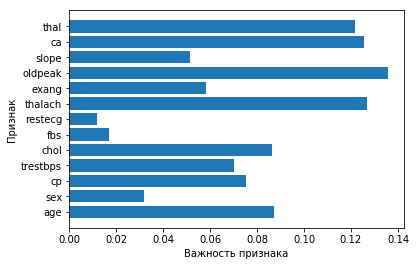

In [12]:
def plot_feature_importances_cancer(model):
    n_features = data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), data.columns)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
    
plot_feature_importances_cancer(rfc)

In [13]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [14]:
print(gbrt.score(X_train, y_train))
print(gbrt.score(X_test, y_test))

1.0
0.7631578947368421


## GridSearchCV

In [15]:
rfc_grid_param = {
    'n_estimators': np.arange(1, 200, 20),
    'max_depth': np.arange(1, 20, 2)
}

In [16]:
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, rfc_grid_param, cv=10)
rfc_grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]), 'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [22]:
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)

0.8502202643171806
{'max_depth': 9, 'n_estimators': 21}


In [18]:
gbrt_grid_param = {
    'n_estimators': np.arange(1, 200, 20),
    'max_depth': np.arange(1, 10, 2)
}

In [19]:
gbrt = GradientBoostingClassifier()
gbrt_grid = GridSearchCV(gbrt, gbrt_grid_param, cv=10)
gbrt_grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([  1,  21,  41,  61,  81, 101, 121, 141, 161, 181]), 'max_depth': array([1, 3, 5, 7, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [21]:
print(gbrt_grid.best_score_)
print(gbrt_grid.best_params_)

0.8458149779735683
{'max_depth': 1, 'n_estimators': 61}


In [25]:
confusion = confusion_matrix(y_test, gbrt_grid.predict(X_test))
print("Матрица ошибок:\n{}".format(confusion))

Матрица ошибок:
[[28  7]
 [ 5 36]]


In [27]:
print(f1_score(y_test, gbrt_grid.predict(X_test)))

0.8571428571428572


In [30]:
print(classification_report(y_test, gbrt_grid.predict(X_test), target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

   micro avg       0.84      0.84      0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

